<a href="https://colab.research.google.com/github/Susmithareddya/Udemy_sales_analysis/blob/main/Sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Analysis on courses which are available on Udemy's website


In [ ]:
#importing pandas to load the csv file
import pandas as pd
df = pd.read_csv("S:/Data_science project/udemy/udemy_output_All_Business_p1_p626.csv")

In [ ]:
#Exploring the data
labels= df.columns
print(labels)
print(labels.size)

Index(['id', 'title', 'url', 'is_paid', 'num_subscribers', 'avg_rating',
       'avg_rating_recent', 'rating', 'num_reviews', 'is_wishlisted',
       'num_published_lectures', 'num_published_practice_tests', 'created',
       'published_time', 'discount_price__amount', 'discount_price__currency',
       'discount_price__price_string', 'price_detail__amount',
       'price_detail__currency', 'price_detail__price_string'],
      dtype='object')
20


id: A unique identifier for each course.

title: The title of the course.

url: The URL of the course on the Udemy website.

is_paid: A Boolean value indicating whether the course is paid or free.

num_subscribers: The number of students who have subscribed to the course.

avg_rating: The average rating of the course based on student reviews.

avg_rating_recent: The average rating of the course based on recent student reviews.

rating: The overall rating of the course.

num_reviews: The number of student reviews for the course.

is_wishlisted: A Boolean value indicating whether the course is wishlisted by any students.

num_published_lectures: The number of lectures in the course.

num_published_practice_tests: The number of practice tests in the course.

created: The date the course was created on the Udemy platform.

published_time: The date and time the course was published on the Udemy platform.

discount_price__amount: The discounted price of the course in the currency specified in the discount_price__currency column.

discount_price__currency: The currency of the discounted price.

discount_price__price_string: A formatted string representing the discounted price.

price_detail__amount: The regular price of the course in the currency specified in the price_detail__currency column.

price_detail__currency: The currency of the regular price.

price_detail__price_string: A formatted string representing the regular price

In [ ]:
df.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


# Preprocessing Data

In [ ]:
correlation = df['avg_rating_recent'].corr(df['rating'])

# Print correlation
print(correlation)

1.0


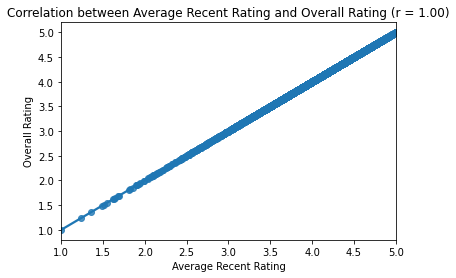

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(x='avg_rating_recent', y='rating', data=df)
plt.xlabel('Average Recent Rating')
plt.ylabel('Overall Rating')
plt.title('Correlation between Average Recent Rating and Overall Rating (r = {:.2f})'.format(correlation))
plt.show()

In [ ]:
df.describe()

,id,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
count,9.447000e+03,9447.000000,9447.000000,9447.000000,9447.000000,9447.000000,9447.000000,9447.000000,8937.000000,9447.000000
mean,1.456603e+06,3399.298190,4.138522,4.124756,4.124756,299.054515,34.400868,0.101831,488.984111,4828.758336
std,8.956601e+05,10451.534122,0.453581,0.478410,0.478410,1826.867472,46.061088,0.580037,247.833161,3108.307674
min,2.762000e+03,3.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,455.000000,1280.000000
25%,6.730310e+05,141.000000,3.900000,3.879410,3.879410,12.000000,13.000000,0.000000,455.000000,1600.000000
50%,1.381806e+06,916.000000,4.200000,4.206080,4.206080,33.000000,23.000000,0.000000,455.000000,3840.000000
75%,2.154793e+06,2889.500000,4.450000,4.447495,4.447495,110.000000,39.000000,0.000000,455.000000,8640.000000
max,3.469452e+06,374836.000000,5.000000,5.000000,5.000000,78006.000000,699.000000,6.000000,3200.000000,12800.000000


From the correlation and summary of statistics , we can say that Correlation between Average Recent Rating and Rating is 1 which means both columns have the same data.

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


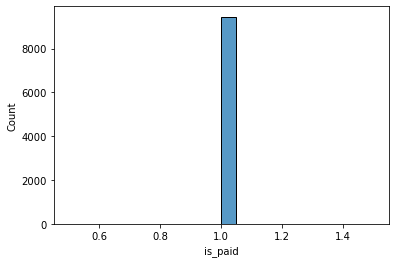

In [ ]:
sns.histplot(df['is_paid'], bins=20)
plt.show()

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


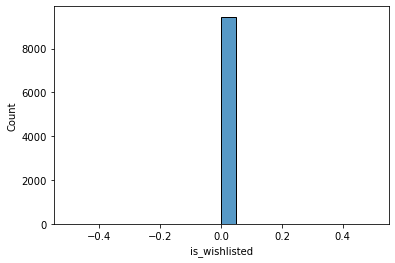

In [ ]:
sns.histplot(df['is_wishlisted'], bins=20)
plt.show()

Based on the univariate analysis, it appears that all courses in the dataset are paid courses, as the 'is_paid' attribute has only one value i.e TRUE. Additionally, there are no wishlisted courses, as the 'is_wishlisted' attribute also has only one value that is FALSE.

In [ ]:
df.drop(['url', 'is_paid', 'rating', 'is_wishlisted', 'discount_price__currency',
      'discount_price__price_string',
       'price_detail__currency', 'price_detail__price_string', 'created'], axis=1,inplace=True)

In [ ]:
print(df.discount_price__amount)

0       455.0
1       455.0
2       455.0
3       455.0
4       455.0
        ...  
9442    455.0
9443    455.0
9444    455.0
9445    455.0
9446    455.0
Name: discount_price__amount, Length: 9447, dtype: float64


In [ ]:
from scipy import stats

# Get the mode(s) of the column
discount_price_modes = stats.mode(df['discount_price__amount'])

# Print the mode(s)
print(discount_price_modes)


ModeResult(mode=array([455.]), count=array([8350]))


In [ ]:
df['discount_price__amount'].isnull().sum()

510

In [ ]:
discount_price_values = df['discount_price__amount'].values
print(discount_price_values)

[455. 455. 455. ... 455. 455. 455.]


In [ ]:
df.head(9000)

,id,title,num_subscribers,avg_rating,avg_rating_recent,num_reviews,num_published_lectures,num_published_practice_tests,published_time,discount_price__amount,price_detail__amount
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,295509,4.66019,4.67874,78006,84,0,2016-04-06T05:16:11Z,455.0,8640.0
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,209070,4.58956,4.60015,54581,78,0,2016-08-23T16:59:49Z,455.0,8640.0
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,155282,4.59491,4.59326,52653,292,2,2017-11-14T23:58:14Z,455.0,8640.0
3,648826,The Complete Financial Analyst Course 2020,245860,4.54407,4.53772,46447,338,0,2016-01-21T01:38:48Z,455.0,8640.0
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,374836,4.47080,4.47173,41630,83,0,2016-01-11T21:39:33Z,455.0,8640.0
...,...,...,...,...,...,...,...,...,...,...,...
8995,1133734,Youtube Means Business - Promote Affiliate Off...,66,4.12500,3.90196,4,14,0,2017-03-08T22:33:57Z,455.0,1280.0
8996,2346010,Live trading 0.1btc into 1btc in 12 days,27,3.75000,3.64513,4,13,0,2019-05-23T00:47:19Z,NaN,2880.0
8997,2451840,Taxes for Self-Employed,26,3.87500,3.96569,4,17,0,2019-08-22T18:15:29Z,455.0,1920.0
8998,1544706,Secret To Spy To Find Winning Shopify Dropship...,12,3.12500,3.40701,4,8,0,2018-02-19T22:24:29Z,455.0,2880.0


In [ ]:
df['discount_price__amount'] = df['discount_price__amount'].fillna(0)

In [ ]:
df[df['discount_price__amount'] == 0].head()

,id,title,num_subscribers,avg_rating,avg_rating_recent,num_reviews,num_published_lectures,num_published_practice_tests,published_time,discount_price__amount,price_detail__amount
33,139166,Conscious Listening,27681,4.47545,4.48064,10671,14,0,2013-12-31T16:51:18Z,0.0,2240.0
39,2246852,Emotional Intelligence at Work: Learn from You...,20978,4.45476,4.45477,9594,21,1,2019-03-18T14:09:54Z,0.0,3200.0
40,139200,Powerful speaking,34296,4.43750,4.45212,9520,19,0,2013-12-31T16:52:41Z,0.0,2240.0
80,43319,Options Trading Basics (3-Course Bundle),28932,4.42527,4.41998,4881,47,0,2013-02-25T11:36:06Z,0.0,9600.0
90,328266,Project Management Professional (PMP)® - 35 Co...,27653,4.40769,4.41472,4579,345,0,2014-11-05T21:07:38Z,0.0,12800.0


# Analysing and Visualization

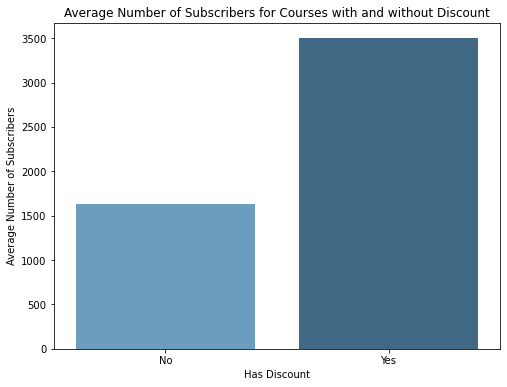

In [ ]:
# Create a new column 'has_discount' that indicates whether a course has a discount or not
df['has_discount'] = df['discount_price__amount'].apply(lambda x: 'Yes' if x != 0 else 'No')

# Group the data by 'has_discount' and calculate the average number of subscribers for each group
avg_subs_by_discount = df.groupby('has_discount')['num_subscribers'].mean()

# Create a bar plot
plt.figure(figsize=(8,6))
sns.barplot(x=avg_subs_by_discount.index, y=avg_subs_by_discount.values, palette='Blues_d')
plt.xlabel('Has Discount')
plt.ylabel('Average Number of Subscribers')
plt.title('Average Number of Subscribers for Courses with and without Discount')
plt.show()

Courses with discounts tend to attract more subscribers. This implies that offering discounts could be a useful strategy for the company to attract more users to its platform and improve its performance.

<AxesSubplot:xlabel='num_subscribers', ylabel='title'>

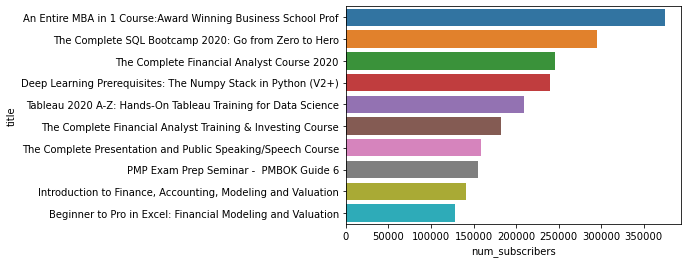

In [ ]:
top_10_subscribers = df.sort_values(by='num_subscribers', ascending=False).head(10)
sns.barplot(x='num_subscribers', y='title', data=top_10_subscribers[:10])

In [ ]:
corr_matrix = df[['num_reviews', 'num_subscribers']].corr()
print(corr_matrix)

                 num_reviews  num_subscribers
num_reviews         1.000000         0.790876
num_subscribers     0.790876         1.000000


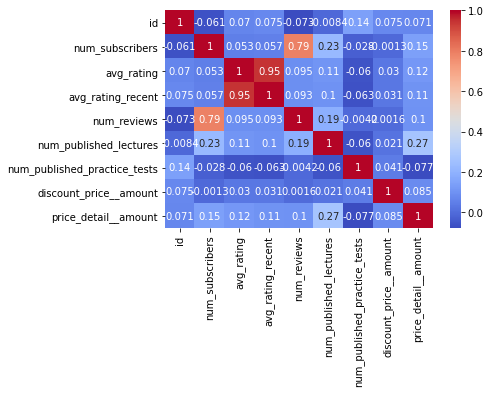

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

 Courses with a higher number of reviews tend to have a higher number of subscribers.

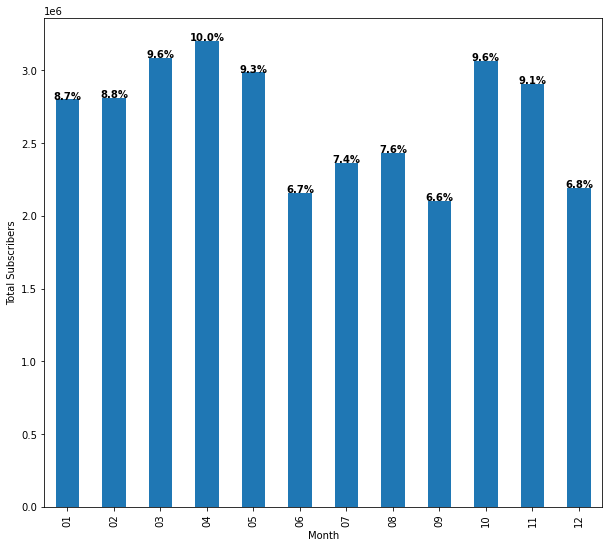

In [ ]:
# convert the "published_time" column to a datetime object
df["published_time"] = pd.to_datetime(df["published_time"])

# group the data by month and calculate the total number of subscribers for each month
monthly_subscribers = df.groupby(df["published_time"].dt.strftime("%m"))["num_subscribers"].sum()

# calculate the percentage of total subscribers for each month
total_subscribers = monthly_subscribers.sum()
monthly_subscribers_percent = monthly_subscribers / total_subscribers * 100

# plot the results
ax = monthly_subscribers.plot(kind="bar", xlabel="Month", ylabel="Total Subscribers",figsize=(10, 9))

# add percentage text to each bar
for i, v in enumerate(monthly_subscribers_percent):
    ax.text(i, monthly_subscribers[i]+1000, str(round(v, 1))+"%", ha="center", fontweight="bold")

# set x-axis tick labels
ax.set_xticklabels(monthly_subscribers.index, rotation=90)
plt.show()